In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import os

In [46]:
from pathlib import Path

# Configurable parts
SYMBOL = "USDJPY"
SAMPLE_TYPE = "time"
MINUTES = 5

START_DATE = "20240101"
END_DATE = "20241231"

# Build base name
RESAMPLED_NAME = f"{SYMBOL}-{MINUTES}m-{START_DATE}-{END_DATE}"

# Base directories
BASE_DIR = Path("../data")
RESAMPLED_DIR = BASE_DIR / "resampled"
PROCESSED_DIR = BASE_DIR / "processed"
EVENTS_DIR = BASE_DIR / "interm/events"

# Final paths
RESAMPLED_FILE_PATH = RESAMPLED_DIR / f"{RESAMPLED_NAME}.pkl"
PROCESSED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}_FEATURES.pkl"

In [47]:
%%time
df = pd.read_pickle(PROCESSED_FILE_PATH)

CPU times: user 1.35 ms, sys: 8.07 ms, total: 9.42 ms
Wall time: 7.35 ms


In [48]:
df.shape

(73782, 60)

In [49]:
df.head()

,open,high,low,close,volume,spread,close_pct_return,close_return,close_log_return,close_fd_return,...,dom,month,hour_sin,hour_cos,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-05 03:25:00,144.8960,144.9415,144.8940,144.9105,2.780660e+12,0.006927,0.000100,0.0145,0.000100,2.788711,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
2024-01-05 03:30:00,144.9100,144.9490,144.9060,144.9470,2.220040e+12,0.006398,0.000252,0.0365,0.000252,2.810244,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
2024-01-05 03:35:00,144.9465,144.9490,144.9230,144.9240,3.450710e+12,0.006930,-0.000159,-0.0230,-0.000159,2.762497,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
2024-01-05 03:40:00,144.9245,144.9460,144.9155,144.9430,2.273510e+12,0.007072,0.000131,0.0190,0.000131,2.784171,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
2024-01-05 03:45:00,144.9435,144.9510,144.9355,144.9465,1.925300e+12,0.006585,0.000024,0.0035,0.000024,2.775585,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025


In [50]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'spread', 'close_pct_return',
       'close_return', 'close_log_return', 'close_fd_return', 'EMA_5',
       'EMA_20', 'EMA_50', 'EMA_100', 'ATRr_14', 'ATRr_60', 'ATRr_120',
       'ADX_14', 'ADXR_14_2', 'DMP_14', 'DMN_14', 'RSI_14', 'RSI_25', 'RSI_50',
       'BBL_5_2.0_2.0', 'BBM_5_2.0_2.0', 'BBU_5_2.0_2.0', 'BBB_5_2.0_2.0',
       'BBP_5_2.0_2.0', 'BBL_10_2.0_2.0', 'BBM_10_2.0_2.0', 'BBU_10_2.0_2.0',
       'BBB_10_2.0_2.0', 'BBP_10_2.0_2.0', 'BBL_15_2.0_2.0', 'BBM_15_2.0_2.0',
       'BBU_15_2.0_2.0', 'BBB_15_2.0_2.0', 'BBP_15_2.0_2.0', 'BBL_20_2.0_2.0',
       'BBM_20_2.0_2.0', 'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0',
       'MACD_8_17_9', 'MACDh_8_17_9', 'MACDs_8_17_9', 'unix_time', 'hour',
       'dow', 'dom', 'month', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos',
       'dom_sin', 'dom_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [51]:
FAST = 9
SLOW = 20
EVENT_PATH = EVENTS_DIR / f"{RESAMPLED_NAME}_EMA_CROSS_{FAST}_{SLOW}.pkl"

## Calculating EMA

In [52]:
import pandas_ta as ta

In [53]:
df.ta.ema(length=FAST, append=True)
df.ta.ema(length=SLOW, append=True)
df.dropna(inplace=True)
df.head()

,open,high,low,close,volume,spread,close_pct_return,close_return,close_log_return,close_fd_return,...,month,hour_sin,hour_cos,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos,EMA_9
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-05 05:00:00,144.8500,144.8675,144.8035,144.8095,3.210920e+12,0.006975,-0.000283,-0.0410,-0.000283,2.688681,...,1,0.965926,0.258819,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025,144.849093
2024-01-05 05:05:00,144.8120,144.8695,144.8050,144.8690,2.405210e+12,0.006919,0.000411,0.0595,0.000411,2.768582,...,1,0.965926,0.258819,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025,144.853074
2024-01-05 05:10:00,144.8695,144.8765,144.8055,144.8065,3.067110e+12,0.006854,-0.000431,-0.0625,-0.000432,2.681286,...,1,0.965926,0.258819,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025,144.843759
2024-01-05 05:15:00,144.8070,144.8070,144.7030,144.7370,4.986710e+12,0.006663,-0.000480,-0.0695,-0.000480,2.637977,...,1,0.965926,0.258819,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025,144.822407
2024-01-05 05:20:00,144.7375,144.7380,144.6815,144.6990,2.673650e+12,0.005379,-0.000263,-0.0380,-0.000263,2.640229,...,1,0.965926,0.258819,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025,144.797726


## Finding Cross Points

In [54]:
df['ema_cross_flag'] = df[f'EMA_{FAST}'] > df[f'EMA_{SLOW}']
df.head()

,open,high,low,close,volume,spread,close_pct_return,close_return,close_log_return,close_fd_return,...,hour_sin,hour_cos,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos,EMA_9,ema_cross_flag
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-05 05:00:00,144.8500,144.8675,144.8035,144.8095,3.210920e+12,0.006975,-0.000283,-0.0410,-0.000283,2.688681,...,0.965926,0.258819,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025,144.849093,False
2024-01-05 05:05:00,144.8120,144.8695,144.8050,144.8690,2.405210e+12,0.006919,0.000411,0.0595,0.000411,2.768582,...,0.965926,0.258819,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025,144.853074,False
2024-01-05 05:10:00,144.8695,144.8765,144.8055,144.8065,3.067110e+12,0.006854,-0.000431,-0.0625,-0.000432,2.681286,...,0.965926,0.258819,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025,144.843759,False
2024-01-05 05:15:00,144.8070,144.8070,144.7030,144.7370,4.986710e+12,0.006663,-0.000480,-0.0695,-0.000480,2.637977,...,0.965926,0.258819,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025,144.822407,False
2024-01-05 05:20:00,144.7375,144.7380,144.6815,144.6990,2.673650e+12,0.005379,-0.000263,-0.0380,-0.000263,2.640229,...,0.965926,0.258819,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025,144.797726,False


In [55]:
t_events = df.index[df['ema_cross_flag'] != df['ema_cross_flag'].shift(1)]
t_events

DatetimeIndex(['2024-01-05 05:00:00', '2024-01-05 06:15:00',
               '2024-01-05 08:00:00', '2024-01-05 08:55:00',
               '2024-01-05 12:15:00', '2024-01-05 13:30:00',
               '2024-01-05 14:25:00', '2024-01-05 16:55:00',
               '2024-01-05 19:05:00', '2024-01-05 20:10:00',
               ...
               '2024-12-30 01:30:00', '2024-12-30 02:50:00',
               '2024-12-30 04:30:00', '2024-12-30 05:20:00',
               '2024-12-30 07:05:00', '2024-12-30 08:05:00',
               '2024-12-30 09:50:00', '2024-12-30 16:30:00',
               '2024-12-30 18:00:00', '2024-12-30 22:25:00'],
              dtype='datetime64[ns]', name='timestamp', length=3368, freq=None)

### Plotting Results

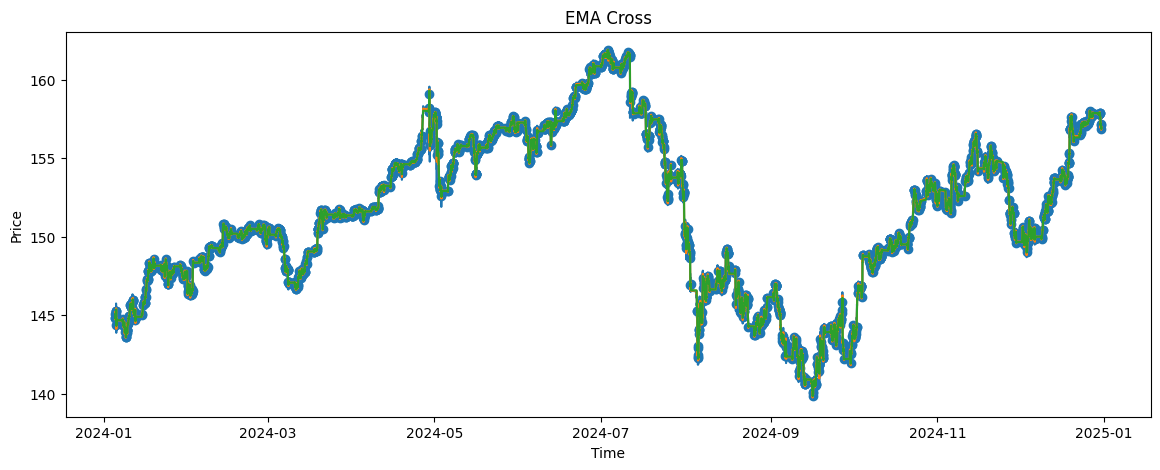

In [56]:
# Using the outputs from (2)
plt.figure(figsize=(14,5))
plt.plot(df.index, df['close'])
plt.plot(df.index, df[f'EMA_{FAST}'])
plt.plot(df.index, df[f'EMA_{SLOW}'])
plt.scatter(t_events, df[f'EMA_{FAST}'].loc[t_events])

plt.title('EMA Cross')
plt.xlabel('Time'); plt.ylabel('Price')
plt.show()

### Saving File

In [57]:
EVENT_PATH

PosixPath('../data/interm/events/USDJPY-5m-20240101-20241231_EMA_CROSS_9_20.pkl')

In [58]:
t_events.to_series().to_pickle(EVENT_PATH)